## Análise de Dados das empresas de táxi em Chicago

Trabalharemos com 3 conjuntos de dados. O primeiro contém os nomes das empresas e o número de viagens feitas pelos táxis dessas empresas. O segundo contém os nomes dos locais de desembarque (bairros) e a média de viagens para esses bairros. O primeiro e o segundo serão usados para a análise principal. O terceiro conjunto de dados contém datas, horários, condições climáticas e durações de viagens do bairro `Loop` para o Aeroporto Internacional `O'Hare` aos sábados. Este conjunto de dados será usado para testes de hipóteses.

## Sumário
1. [Iniciação](#inic)

2. [Análise Exploratória de Dados](#aed)
    
    A. [Os 10 principais locais de entregas](#plen)

    B. [Classificação das empresas pelo número de viagens](#cenv)

5. [Teste de Hipóteses](#thip)

6. [Conclusão](#conc)

## Iniciação <a id="inic"></a>

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np

## Carregando dados

In [2]:
try:
    company_data = pd.read_csv('project_sql_result_01.csv')
    dropoff_data = pd.read_csv('project_sql_result_04.csv')
    loop_ohare = pd.read_csv('project_sql_result_07.csv') 
except:
    company_data = pd.read_csv('/datasets/project_sql_result_01.csv')
    dropoff_data = pd.read_csv('/datasets/project_sql_result_04.csv')
    loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv') 

## Obtendo informações gerais e cuidando de valores

In [3]:
company_data.info()
company_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
company_data.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


Observamos que não há valores ausentes e que os tipos de dados estão corretos.

In [5]:
dropoff_data.info()
dropoff_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [6]:
dropoff_data.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


O tipo de dado da coluna `average_trips` está incorreto, visto que não existe viagem incompleta deve ser alterado de float para inteiro.

In [7]:
dropoff_data['average_trips'] = dropoff_data['average_trips'].round()
dropoff_data['average_trips'] = dropoff_data['average_trips'].astype('int')

dropoff_data.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547


In [8]:
dropoff_data.describe()

,average_trips
count,94.000000
mean,599.957447
std,1714.615082
min,2.000000
25%,14.000000
50%,52.000000
75%,298.750000
max,10727.000000


## Análise Exploratória de Dados <a id="aed"></a>

### Os 10 principais locais de entregas <a id="plen"></a>

In [9]:
top10 = dropoff_data.sort_values(by='average_trips', ascending=False).head(10)
top10

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


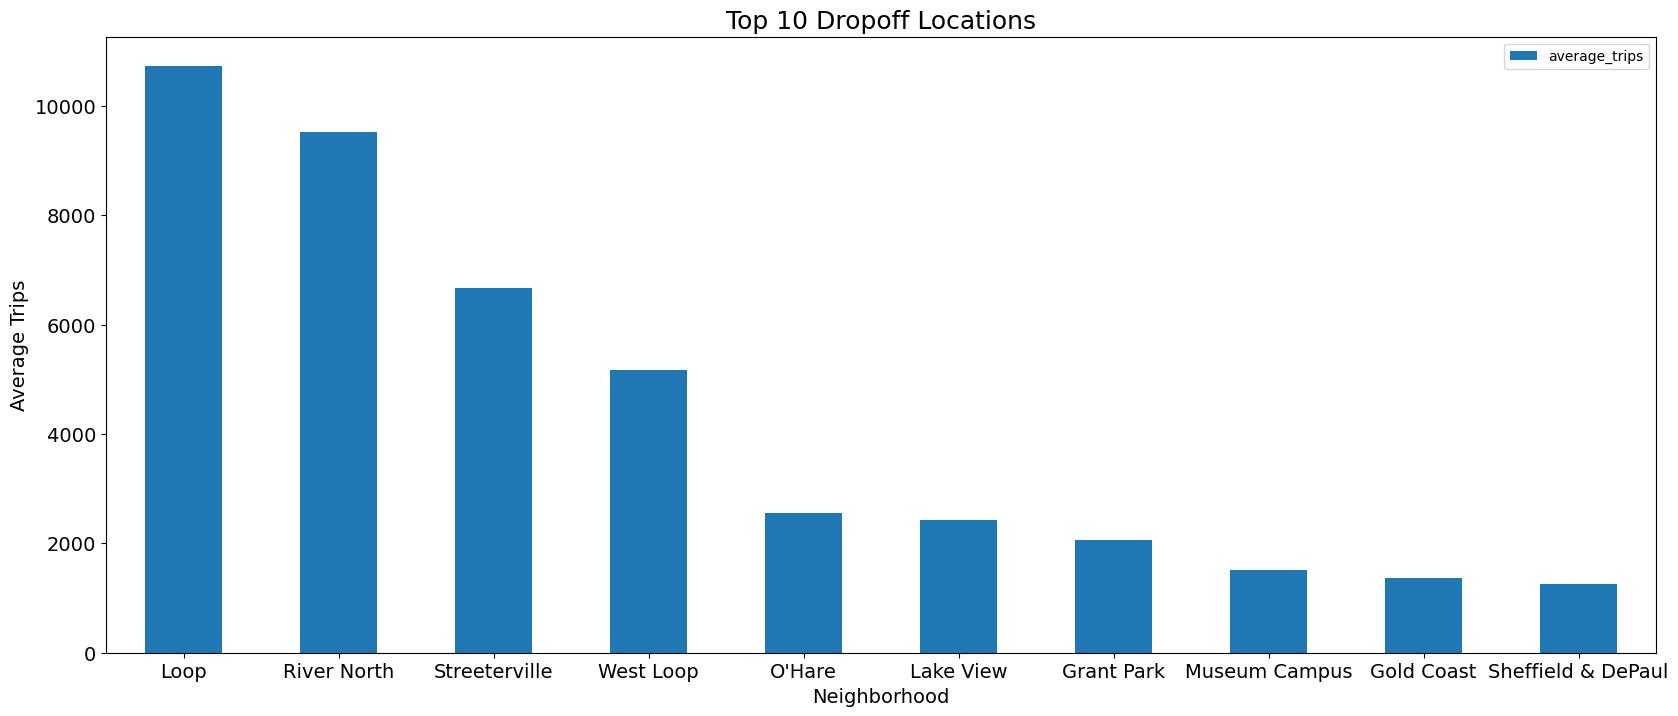

In [10]:
top10.plot.bar(x='dropoff_location_name', y='average_trips', rot=0, figsize=(20, 8))

plt.title('Top 10 Dropoff Locations', fontsize=18)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Average Trips', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Os destinos mais populares são `Loop`, `River North`, `Streeterville` e `West Loop` como visto acima. O menos popular é o `Sheffield & DePaul`. É notável a discrepância entre as viagens dos top 4 e o resto, até mesmo do quarto para o quinto lugar há cerca do dobro em diferença de visitas totais.

### Classificação das empresas pelo número de viagens <a id="cenv"></a>

In [11]:
company_data['trips_amount'].describe()

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

Analisando notamos que será necessário filtrar os dados, já que o valor mínimo é muito baixo, portanto, um limite será definido e devido aos números grandes o gráfico ficará na horizontal.

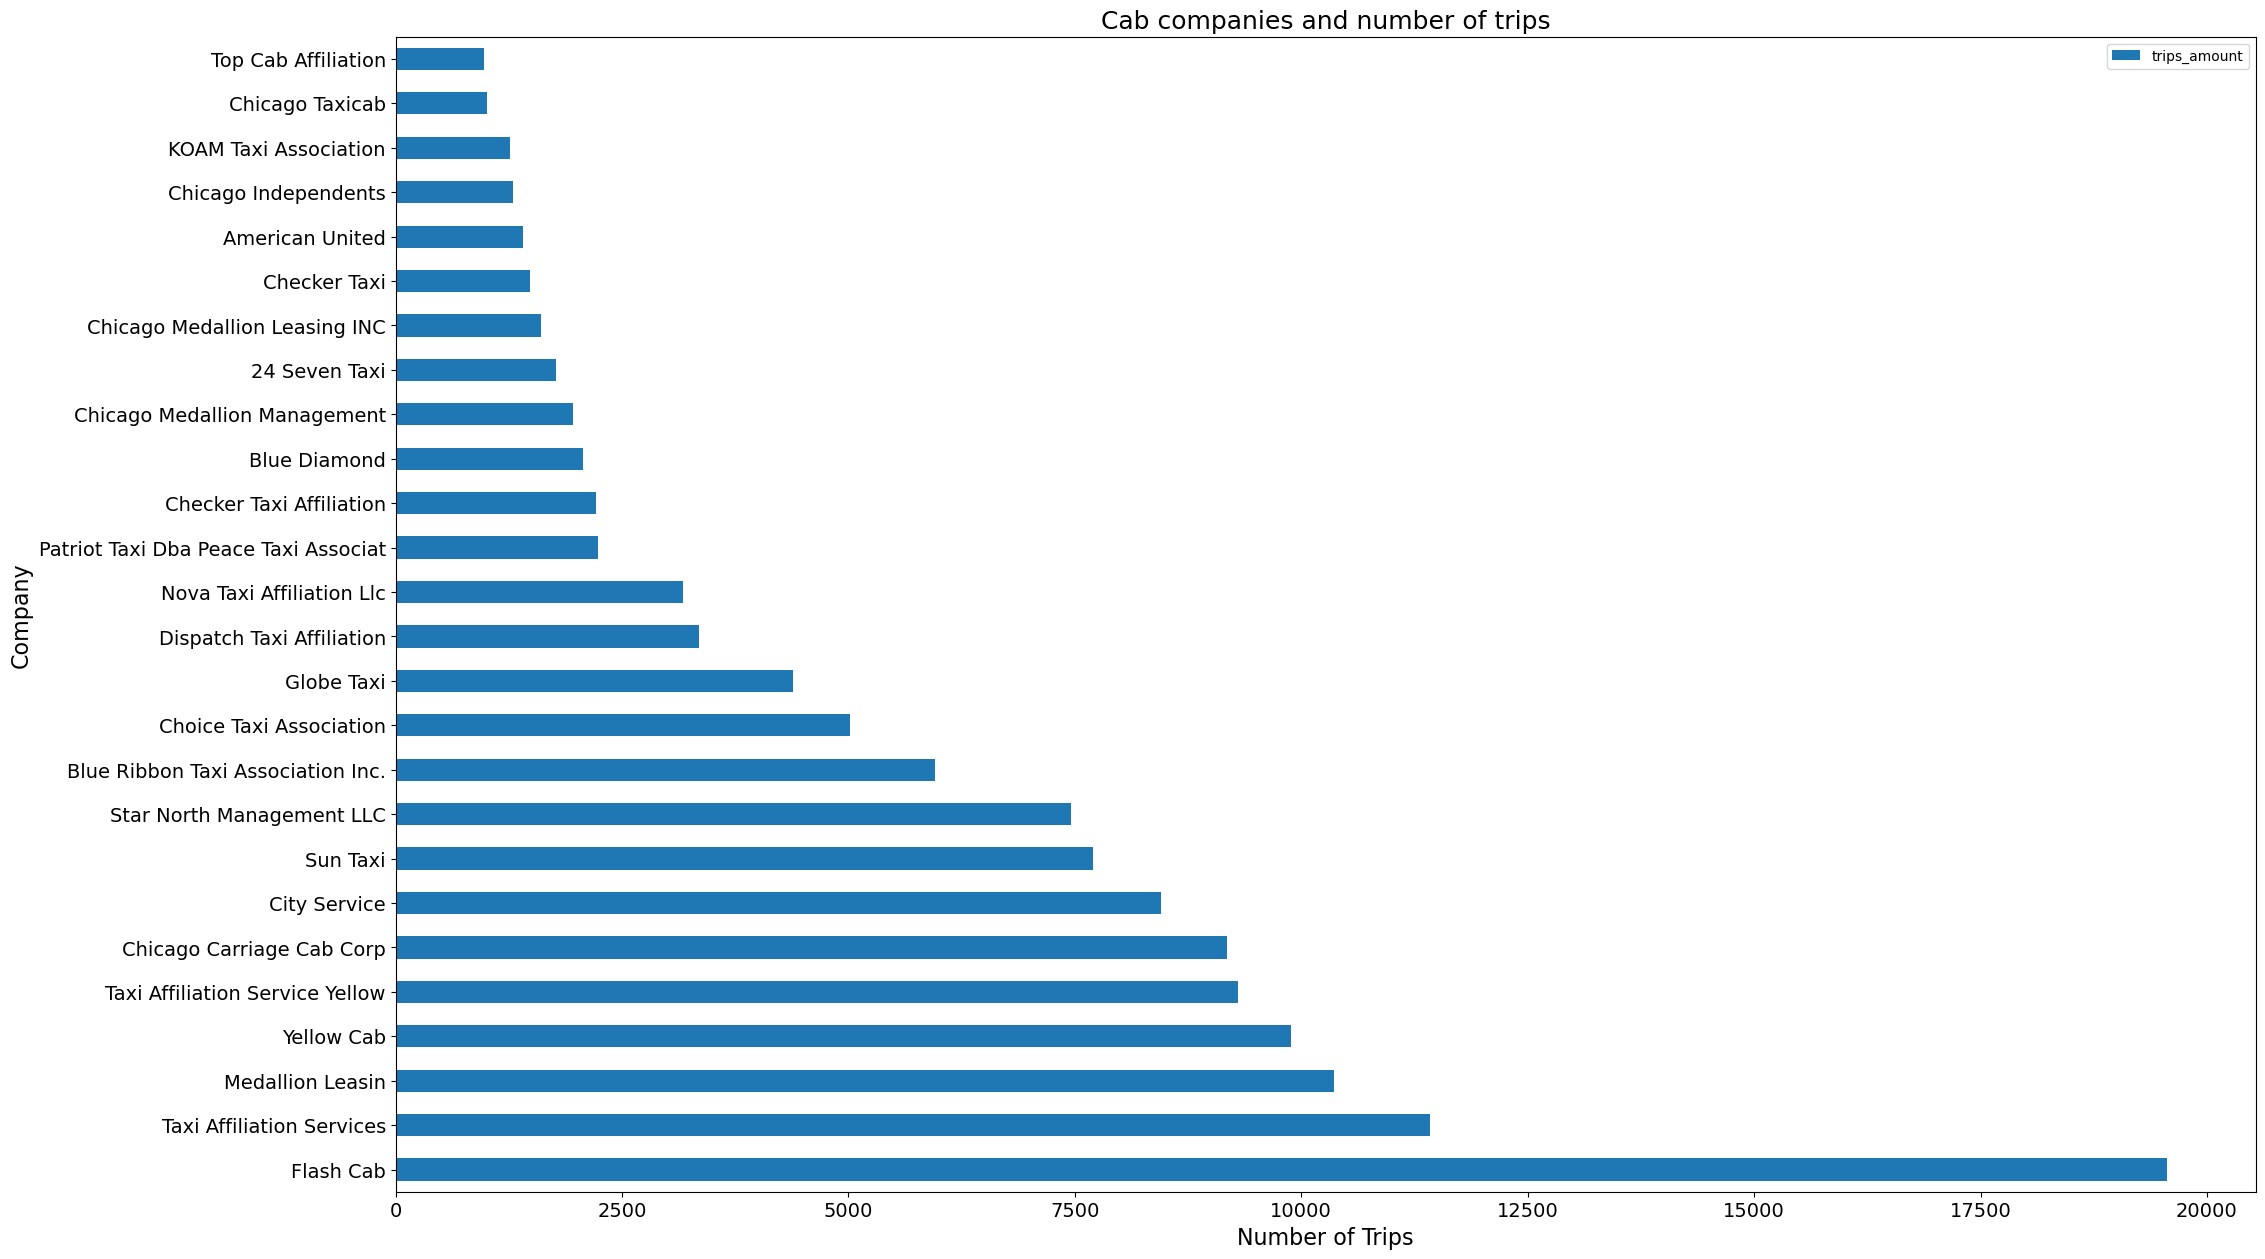

In [12]:
company_data.query('trips_amount >= 500').plot.barh(x='company_name', y='trips_amount', rot=0, figsize=(24, 15))
plt.title('Cab companies and number of trips', fontsize=18)
plt.xlabel('Number of Trips', fontsize=16)
plt.ylabel('Company', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

`Flash Cab` é sem dúvida a empresa líder. Devido à sua posição dominante, é provável que eles possuam a maior frota de táxis em operação, o que lhes confere uma grande vantagem em termos de disponibilidade e alcance geográfico.

A empresa que ocupa a segunda posição em nosso levantamento é a `Taxi Affiliation Services`. Embora esteja bem atrás da líder, ainda é uma empresa com uma presença significativa no mercado de táxis.

Ao aplicarmos um critério de filtragem com um limite mínimo de 500 viagens, observamos que apenas 26 empresas atendem a esse requisito e estão representadas em nosso gráfico. Isso significa que 38 empresas tiveram menos de 500 viagens, o que indica uma pulverização do mercado em pequenas empresas com uma fatia de mercado menor.

## Teste de hipóteses <a id="thip"></a>

Hipótese: a duração das corridas do `Loop` até ao Aeroporto Internacional `O'Hare` muda em sábados chuvosos.

In [13]:
loop_ohare.info()
loop_ohare.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


O único problema é alterar o tipo de dado da coluna `start_ts` para data e hora. Para isso, o método `pd.to_datetime` será usado com o argumento de formato `%Y%m%d %H%M%S`, a fim de refletir o formato existente na coluna.

In [14]:
loop_ohare['start_ts'] = pd.to_datetime(loop_ohare['start_ts'], format='%Y-%m-%d %H:%M:%S')
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Em seguida, criaremos duas seleções: uma em que o valor da coluna `weather_conditions` é `Good` e outra em que o valor é `Bad`.

In [15]:
good_weather = loop_ohare.query('weather_conditions == "Good"')
good_weather.info()

bad_weather = loop_ohare.query('weather_conditions == "Bad"')
bad_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 1066
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            888 non-null    datetime64[ns]
 1   weather_conditions  888 non-null    object        
 2   duration_seconds    888 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            180 non-null    datetime64[ns]
 1   weather_conditions  180 non-null    object        
 2   duration_seconds    180 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.6+ KB


A hipótese nula é: "A duração média das corridas do Loop para o Aeroporto Internacional `O'Hare` é a mesma em sábados chuvosos". 
A hipótese alternativa é: "A duração média das corridas do `Loop` para o Aeroporto Internacional `O'Hare` muda em sábados chuvosos".

Antes do teste da hipótese, é necessário verificar se as variâncias das amostras podem ser consideradas homogêneas. Para isso, implementaremos o teste de Levene usando o método st.levene(). Este método receberá as colunas "user_score" de ambas as seleções como argumentos e também definiremos o parâmetro `center='mean'`. Este método retorna um valor de `p` que compararemos com um limite chamado significância estatística (comumente chamado de alfa). Definiremos alfa como 5%. Se o valor de `p` retornado for maior que nosso alfa, as variâncias podem ser consideradas homogêneas. Se for menor que nosso alfa, as variâncias não podem ser consideradas homogêneas.

Somente depois de confirmarmos que as variâncias são homogêneas, podemos prosseguir com o teste de hipótese para verificar se há uma diferença significativa na duração média das corridas entre sábados chuvosos e sábados sem chuva.

In [16]:
alpha = 0.05

result = st.levene(good_weather['duration_seconds'], bad_weather['duration_seconds'], center='mean')
print('p-value:', result.pvalue)

if result.pvalue > alpha:
    print('As variações são aproximadamente as mesmas')
else:
    print('As variações estão muito distantes para serem consideradas homogêneas')

p-value: 0.3968505113995001
As variações são aproximadamente as mesmas


Após verificar que o valor de `p` é superior ao nível de significância (`alpha`), podemos considerar que as variâncias são equivalentes para o teste de hipótese em questão. Para avaliar a hipótese, utilizaremos o método `st.ttest_ind()`, que compara a probabilidade das médias de duas populações estatísticas (no caso, as colunas das duas seleções) serem diferentes. Ambas as colunas serão passadas como argumentos, sendo que definiremos o parâmetro `equal_var=True` porque concluímos a partir do teste de Levene que as variâncias são homogêneas. Esse método também nos fornecerá um valor de `p` que será comparado ao nível de significância estabelecido. Se o valor de `p` for maior que `alpha`, então não podemos rejeitar a hipótese nula, pois as médias provavelmente são iguais. Por outro lado, se o valor de `p` for menor que `alpha`, podemos rejeitar a hipótese nula.

In [17]:
alpha = 0.05

result = st.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'], equal_var=True)
print('p-value:', result.pvalue)

if result.pvalue > alpha:
    print('A hipótese nula não pode ser rejeitada')
else:
    print('A hipótese nula foi rejeitada')

p-value: 6.517970327099473e-12
A hipótese nula foi rejeitada


Como o `valor-p` foi menor que `alpha`, rejeitamos a hipótese nula e podemos afirmar que a duração média das viagens do `Loop` ao Aeroporto Internacional `O'Hare` varia em dias de sábado chuvosos.

## Conclusão <a id="conc"></a>

Classificamos os 10 melhores bairros, com o bairro do `Loop` ocupando o primeiro lugar. Além disso, rotulamos as empresas de táxi e observamos a absoluta dominação da `Flash Cab`. Também realizamos um teste de hipótese e comprovamos que a duração média das viagens do `Loop` ao Aeroporto Internacional `O'Hare` varia em dias de sábado chuvosos. Para isso, fizemos uma análise comparativa das médias das duas populações estatísticas e confirmamos que essas médias são diferentes.